In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Hospital_stay.csv')

In [3]:
df

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53
...,...,...,...,...,...,...
513,LTU,2014,6.8,10.57,22.17,10.57
514,LTU,2015,6.6,11.02,21.00,11.02
515,LTU,2016,6.6,12.20,23.01,12.20
516,LTU,2017,6.5,12.37,23.33,12.37


In [4]:
df.isna().sum()

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   Time           518 non-null    int64  
 2   Hospital_Stay  518 non-null    float64
 3   MRI_Units      518 non-null    float64
 4   CT_Scanners    518 non-null    float64
 5   Hospital_Beds  518 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.4+ KB


In [6]:
df.describe()

,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
count,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2007.967181,7.140154,10.565502,19.646718,10.565502
std,6.944160,2.566864,8.685570,14.352069,8.685570
min,1990.000000,3.400000,0.100000,1.480000,0.100000
25%,2003.250000,5.800000,4.072500,10.332500,4.072500
50%,2009.000000,6.650000,8.765000,15.375000,8.765000
75%,2014.000000,7.500000,13.877500,26.592500,13.877500
max,2018.000000,32.700000,55.210000,111.490000,55.210000


In [7]:
 Input  = df.drop(['Hospital_Stay','Time'],axis = 'columns')

In [8]:
Target = df['Hospital_Stay']

In [9]:
Input.head()

,Location,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1.43,16.71,1.43
1,AUS,2.36,18.48,2.36
2,AUS,2.89,20.55,2.89
3,AUS,2.96,21.95,2.96
4,AUS,3.53,23.34,3.53


In [10]:
Input.Location.nunique()

32

In [11]:
Input.Location.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'NLD', 'NZL',
       'POL', 'PRT', 'SVK', 'ESP', 'TUR', 'GBR', 'USA', 'EST', 'ISR',
       'RUS', 'SVN', 'ISL', 'LVA', 'LTU'], dtype=object)

In [12]:
dummies = pd.get_dummies(Input['Location'],drop_first = True)

In [13]:
dummies

,AUT,BEL,CAN,CZE,DEU,DNK,ESP,EST,FIN,FRA,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Input = pd.concat([Input,dummies],axis = 1)

In [15]:
Input

,Location,MRI_Units,CT_Scanners,Hospital_Beds,AUT,BEL,CAN,CZE,DEU,DNK,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,AUS,1.43,16.71,1.43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUS,2.36,18.48,2.36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUS,2.89,20.55,2.89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUS,2.96,21.95,2.96,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUS,3.53,23.34,3.53,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,LTU,10.57,22.17,10.57,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,LTU,11.02,21.00,11.02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515,LTU,12.20,23.01,12.20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516,LTU,12.37,23.33,12.37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   MRI_Units      518 non-null    float64
 2   CT_Scanners    518 non-null    float64
 3   Hospital_Beds  518 non-null    float64
 4   AUT            518 non-null    uint8  
 5   BEL            518 non-null    uint8  
 6   CAN            518 non-null    uint8  
 7   CZE            518 non-null    uint8  
 8   DEU            518 non-null    uint8  
 9   DNK            518 non-null    uint8  
 10  ESP            518 non-null    uint8  
 11  EST            518 non-null    uint8  
 12  FIN            518 non-null    uint8  
 13  FRA            518 non-null    uint8  
 14  GBR            518 non-null    uint8  
 15  GRC            518 non-null    uint8  
 16  HUN            518 non-null    uint8  
 17  IRL            518 non-null    uint8  
 18  ISL       

In [17]:
Input  = Input.drop(['Location'],axis = 1)

In [18]:
Input

,MRI_Units,CT_Scanners,Hospital_Beds,AUT,BEL,CAN,CZE,DEU,DNK,ESP,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,1.43,16.71,1.43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.36,18.48,2.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.89,20.55,2.89,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.96,21.95,2.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.53,23.34,3.53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,10.57,22.17,10.57,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,11.02,21.00,11.02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515,12.20,23.01,12.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516,12.37,23.33,12.37,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(Input,Target,test_size = 0.3)

In [21]:
X_train

,MRI_Units,CT_Scanners,Hospital_Beds,AUT,BEL,CAN,CZE,DEU,DNK,ESP,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
180,22.07,33.65,22.07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,8.89,14.77,8.89,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,19.86,31.05,19.86,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,8.98,31.86,8.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,7.85,30.94,7.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,11.41,19.78,11.41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,13.55,16.95,13.55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,3.76,45.65,3.76,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,4.54,6.91,4.54,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_test

,MRI_Units,CT_Scanners,Hospital_Beds,AUT,BEL,CAN,CZE,DEU,DNK,ESP,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
125,20.23,21.34,20.23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416,1.40,6.37,1.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,0.39,4.65,0.39,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,14.32,24.61,14.32,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
434,0.92,1.58,0.92,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,20.06,30.96,20.06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,3.97,8.86,3.97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
386,7.20,9.30,7.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,6.43,11.08,6.43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
Y_train

180     5.6
79      7.5
175     5.4
261    10.6
260    11.0
       ... 
410     5.9
151     5.5
11      6.1
378     7.3
508     7.2
Name: Hospital_Stay, Length: 362, dtype: float64

In [24]:
Y_test

125     6.9
416     6.2
83     11.6
154    10.1
434    13.6
       ... 
235     6.8
208     5.5
386     6.0
144     5.7
380     6.9
Name: Hospital_Stay, Length: 156, dtype: float64

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [26]:
reg.fit(X_train,Y_train)

LinearRegression()

In [27]:
reg.score(X_test,Y_test)

0.8019764489730566

In [28]:
reg.predict(X_test)

array([ 5.44239641,  5.61109624,  8.10513719,  9.81637652, 11.68181831,
        6.6389655 ,  6.58709612,  7.43729003,  5.65718652,  8.02117223,
        5.61641296,  5.26262853,  7.08632499,  5.77400991,  7.50149634,
        5.82210111, 11.4113138 ,  8.83647353,  8.02438716,  4.30997365,
        7.76825309,  8.07578019, 11.48567713, 11.48728801,  5.59224002,
        6.35430033,  7.80235819,  7.18678386,  6.56668883,  7.70114982,
        7.24759765,  5.4711923 ,  5.66216923,  8.73349979,  7.03172554,
        7.37774213,  8.59547136,  4.88726394,  6.62308878,  8.29087653,
        8.49600261,  7.18188831,  7.33128112,  5.76399071,  5.98194898,
        5.43206479,  6.76947856,  5.1365357 ,  5.94227861,  5.71056423,
        6.7783213 ,  5.90544617,  6.73571124,  5.23508722,  4.41386979,
        7.05716191,  5.20943257,  6.70489815,  3.32002751,  6.92511269,
        5.94435731,  6.87535869,  8.27966946,  6.6753583 ,  7.92541836,
        7.73497771,  6.56496135,  7.20176758,  6.6280836 ,  3.82

In [29]:
y_pred = reg.predict(X_test)

In [30]:
y_pred

array([ 5.44239641,  5.61109624,  8.10513719,  9.81637652, 11.68181831,
        6.6389655 ,  6.58709612,  7.43729003,  5.65718652,  8.02117223,
        5.61641296,  5.26262853,  7.08632499,  5.77400991,  7.50149634,
        5.82210111, 11.4113138 ,  8.83647353,  8.02438716,  4.30997365,
        7.76825309,  8.07578019, 11.48567713, 11.48728801,  5.59224002,
        6.35430033,  7.80235819,  7.18678386,  6.56668883,  7.70114982,
        7.24759765,  5.4711923 ,  5.66216923,  8.73349979,  7.03172554,
        7.37774213,  8.59547136,  4.88726394,  6.62308878,  8.29087653,
        8.49600261,  7.18188831,  7.33128112,  5.76399071,  5.98194898,
        5.43206479,  6.76947856,  5.1365357 ,  5.94227861,  5.71056423,
        6.7783213 ,  5.90544617,  6.73571124,  5.23508722,  4.41386979,
        7.05716191,  5.20943257,  6.70489815,  3.32002751,  6.92511269,
        5.94435731,  6.87535869,  8.27966946,  6.6753583 ,  7.92541836,
        7.73497771,  6.56496135,  7.20176758,  6.6280836 ,  3.82

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2 = r2_score(Y_test,y_pred)

In [33]:
r2

0.8019764489730566

In [34]:
import matplotlib.pyplot as plt

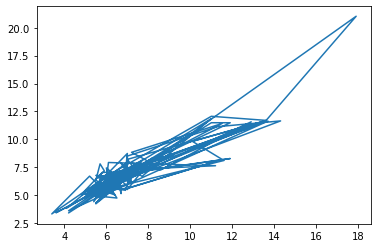

In [35]:
plt.plot(Y_test,y_pred)

<BarContainer object of 156 artists>

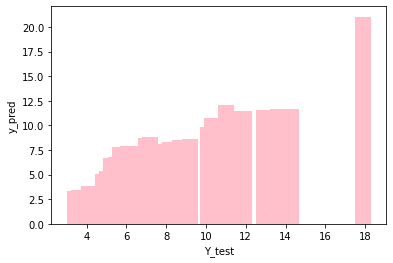

In [36]:
plt.xlabel('Y_test')
plt.ylabel('y_pred')
plt.bar(Y_test,y_pred,color = 'pink')


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [63]:
rog = LogisticRegression()

In [64]:
rog.fit(X_train,Y_train)

ValueError: Unknown label type: 'continuous'